In [22]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler

from k_means import KMeans
from k_medoids import KMedoids
from dbscan import DBSCAN
from hierarchical import AgglomerativeClustering

In [23]:
cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

def plot_comparison(description, X, label_sets, label_titles=None, centroids_list=None):
    num_plots = len(label_sets)
    fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6))
    if num_plots == 1:
        axes = [axes]

    for idx, (ax, labels) in enumerate(zip(axes, label_sets)):
        has_noise = np.any(labels == -1)

        for i in range(X.shape[0]):
            label = labels[i]
            if label == -1:
                ax.scatter(X[i, 0], X[i, 1], color='gray', marker='x')
            else:
                ax.scatter(X[i, 0], X[i, 1], color=cluster_colors[label % len(cluster_colors)], marker='o')

        if centroids_list and centroids_list[idx] is not None:
            centroids = centroids_list[idx]
            ax.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='*', s=150, label='Centroid')

        if has_noise:
            ax.scatter([], [], color='gray', marker='x', label='Noise')
            ax.legend()

        if label_titles:
            ax.set_title(label_titles[idx])
        else:
            ax.set_title(f'Labels {idx+1}')

        ax.grid(True)

    fig.suptitle(description)
    plt.tight_layout()
    plt.show()




In [24]:
test_blobs_X, test_blobs_labels = make_blobs(n_samples=300, centers=4, random_state=2)

test_circles_X, test_circles_labels = make_circles(n_samples=300, factor=0.5, noise=0.05)

test_moons_X, test_moons_labels = make_moons(n_samples=300, noise=0.05)

# 1. K-means

⏱️  Custom KMeans time:   0.0015 seconds
⏱️  Sklearn KMeans time:  0.0023 seconds
📊  ARI (My vs Sklearn):  1.0000


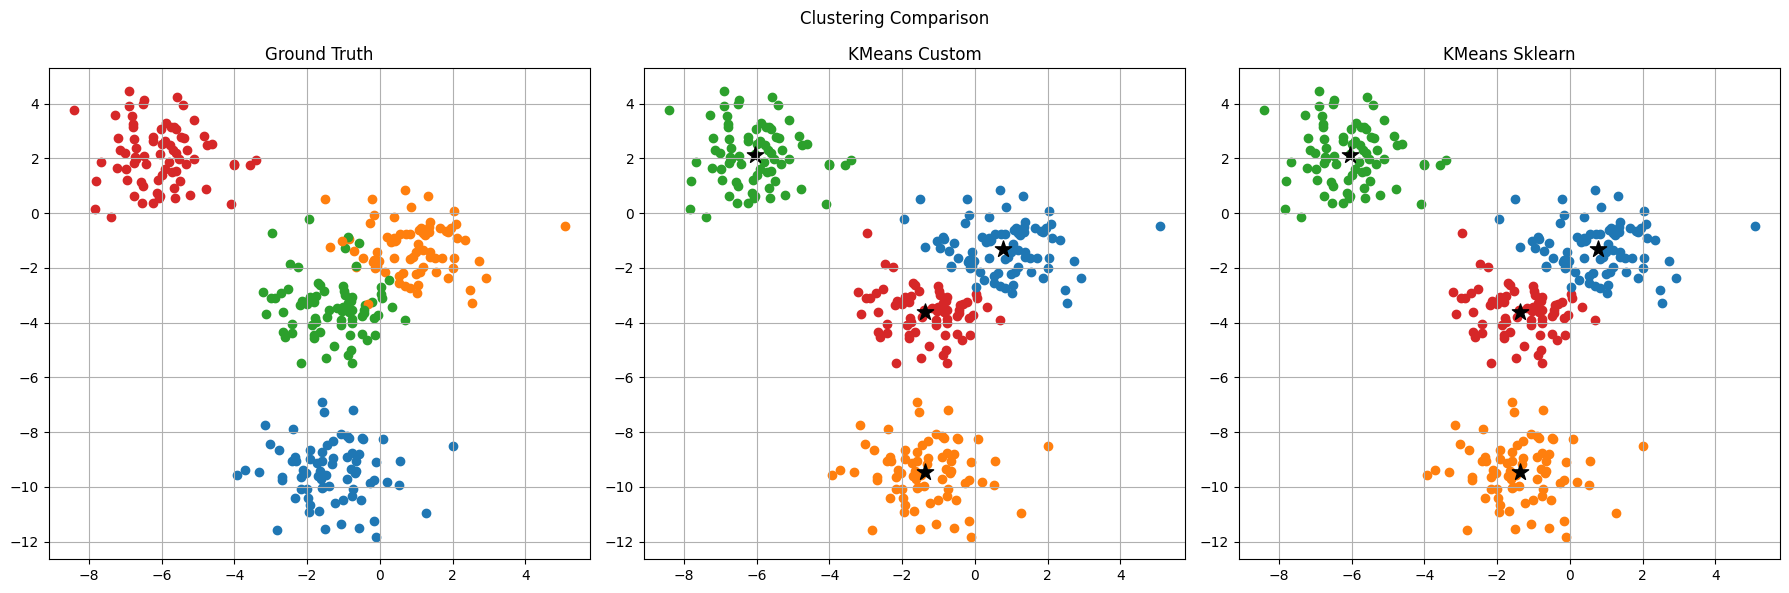

⏱️  Custom KMeans time:   0.0009 seconds
⏱️  Sklearn KMeans time:  0.0018 seconds
📊  ARI (My vs Sklearn):  0.5762


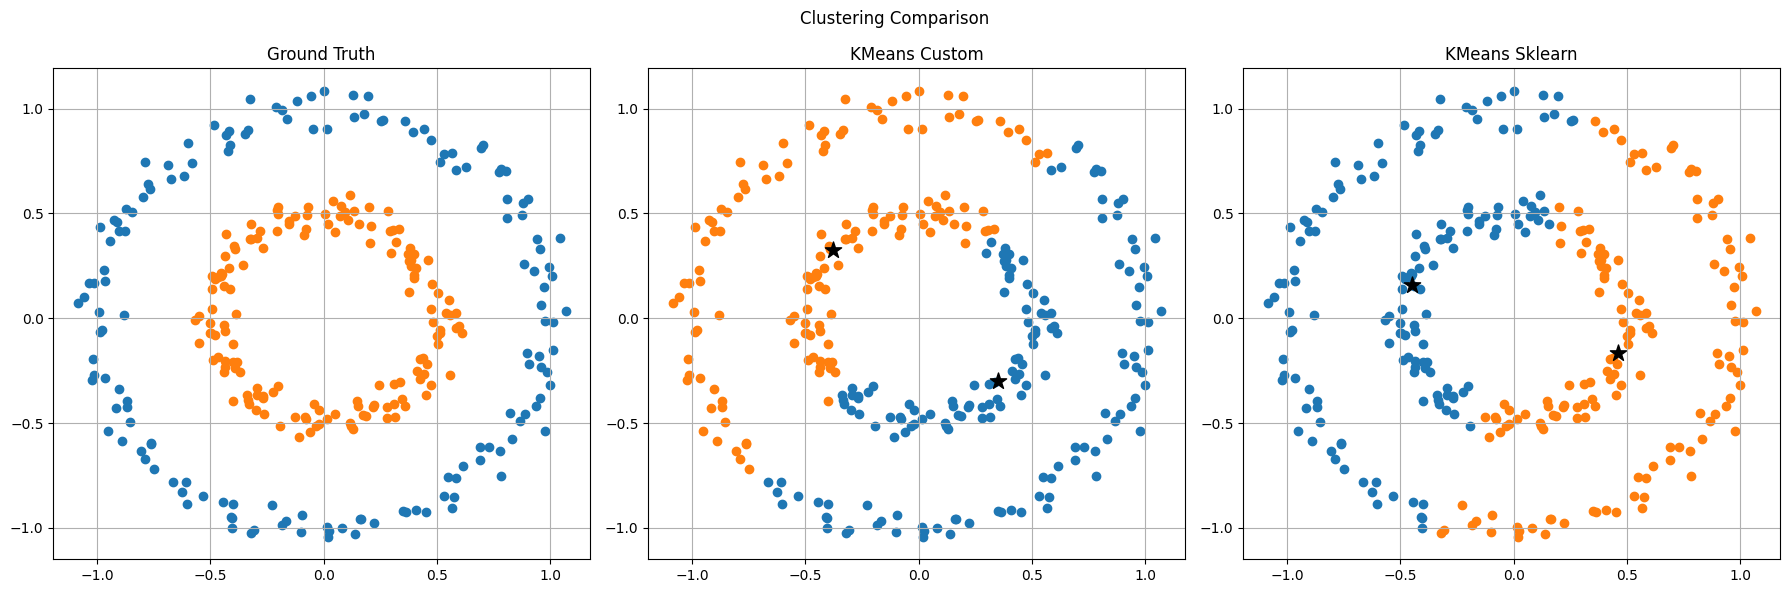

⏱️  Custom KMeans time:   0.0013 seconds
⏱️  Sklearn KMeans time:  0.0015 seconds
📊  ARI (My vs Sklearn):  1.0000


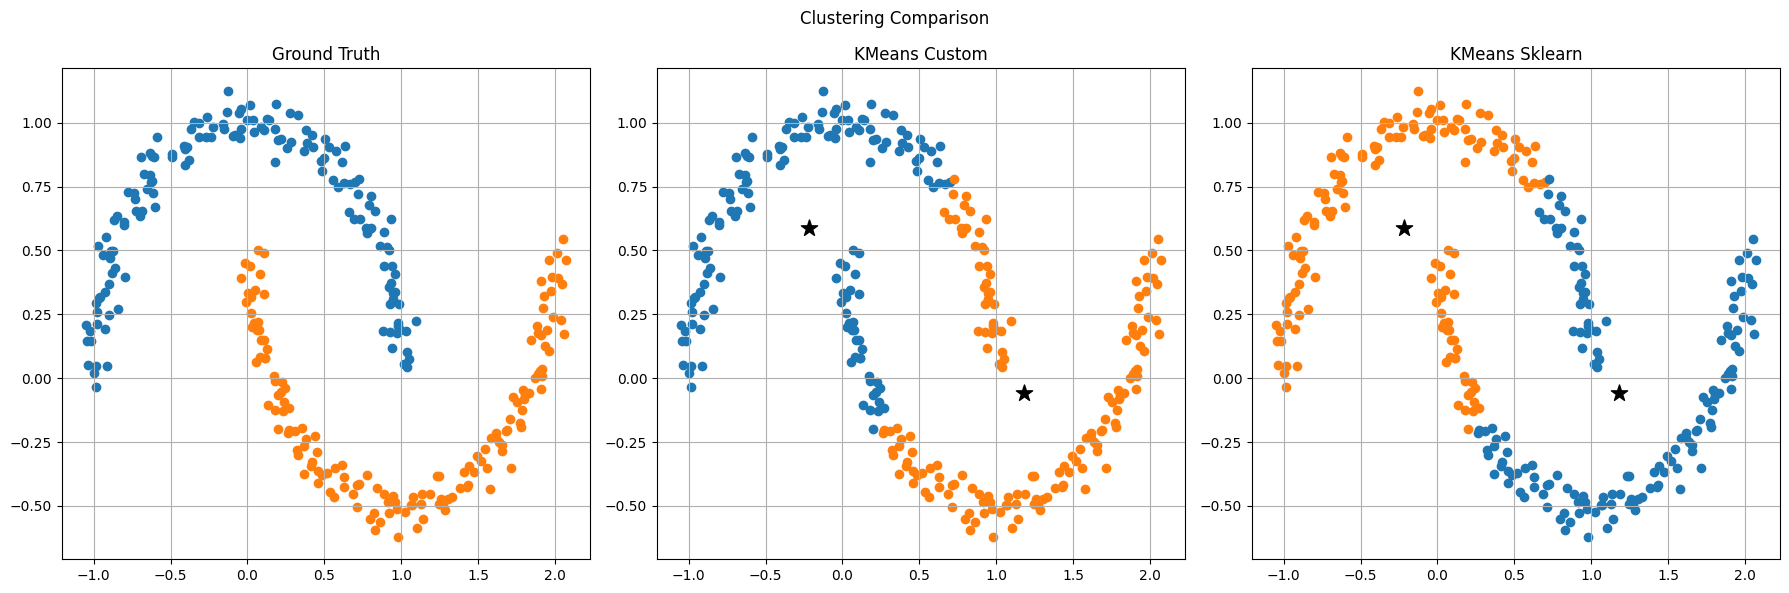

In [25]:
from sklearn.cluster import KMeans as KMeans_sklearn
from sklearn.metrics import adjusted_rand_score
import time

def test_k_means(X, true_Y, n_clusters):
    start_my = time.time()
    kmeans_my = KMeans(n_clusters=n_clusters, random_state=421)
    labels_my, centroids_my = kmeans_my.fit(X)
    end_my = time.time()

    start_sklearn = time.time()
    kmeans = KMeans_sklearn(n_clusters=n_clusters, random_state=421, n_init="auto").fit(X)
    end_sklearn = time.time()

    ari_my_vs_sklearn = adjusted_rand_score(labels_my, kmeans.labels_)

    print(f"⏱️  Custom KMeans time:   {end_my - start_my:.4f} seconds")
    print(f"⏱️  Sklearn KMeans time:  {end_sklearn - start_sklearn:.4f} seconds")
    print(f"📊  ARI (My vs Sklearn):  {ari_my_vs_sklearn:.4f}")

    plot_comparison(
        'Clustering Comparison',
        X=X,
        label_sets=[true_Y, labels_my, kmeans.labels_],
        label_titles=["Ground Truth", "KMeans Custom", "KMeans Sklearn"],
        centroids_list=[None, centroids_my, kmeans.cluster_centers_]
    )

test_k_means(test_blobs_X, test_blobs_labels, n_clusters=4)
test_k_means(test_circles_X, test_circles_labels, n_clusters=2)
test_k_means(test_moons_X, test_moons_labels, n_clusters=2)

# 2. K-medoids

⏱️  Custom KMedoids time:   0.0078 seconds


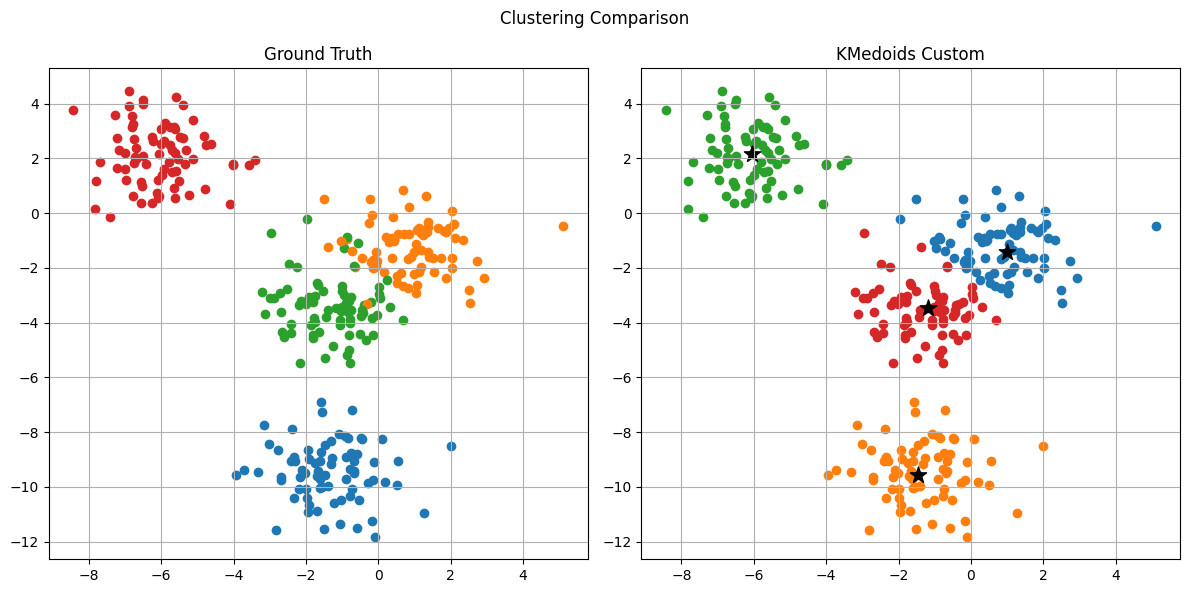

⏱️  Custom KMedoids time:   0.0103 seconds


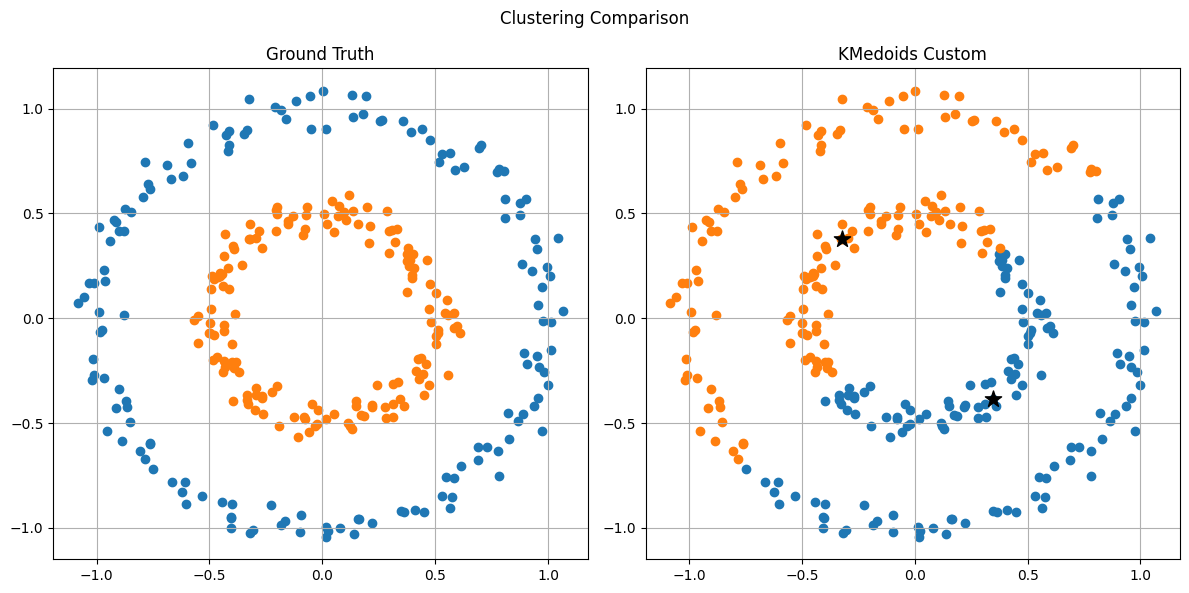

⏱️  Custom KMedoids time:   0.0101 seconds


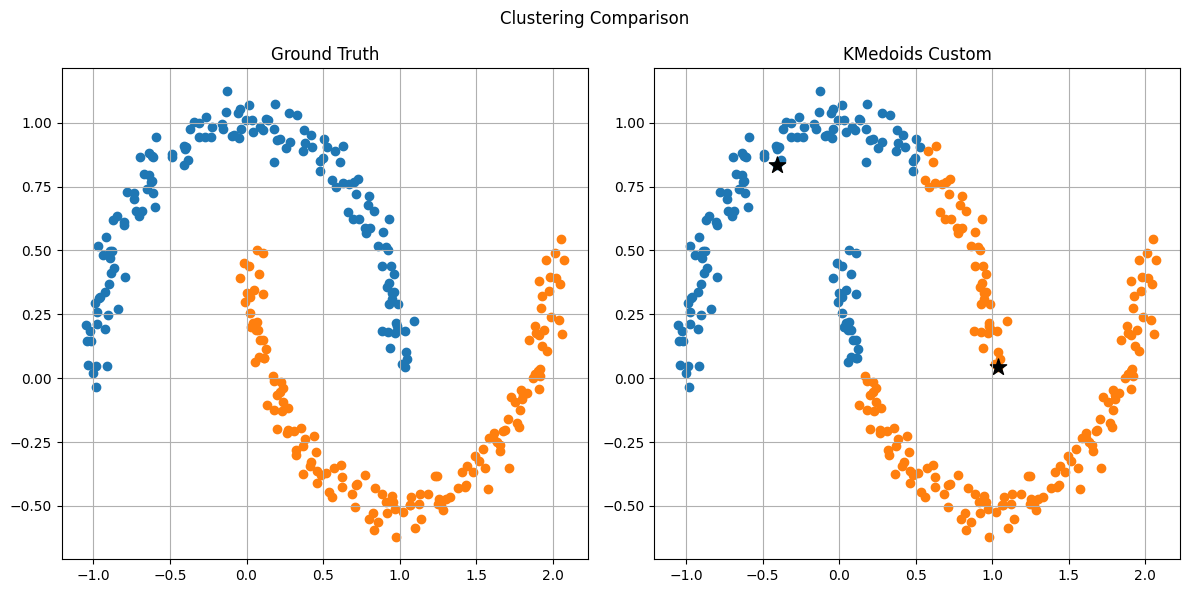

In [26]:
import time

def test_k_medoids(X, Y_true, n_clusters):
    start_my = time.time()
    kmedoids_my = KMedoids(n_clusters=n_clusters, random_state=421)
    labels_my, centroids_my = kmedoids_my.fit(X)
    end_my = time.time()

    print(f"⏱️  Custom KMedoids time:   {end_my - start_my:.4f} seconds")

    plot_comparison(
        'Clustering Comparison',
        X=X,
        label_sets=[Y_true, labels_my],
        label_titles=["Ground Truth", "KMedoids Custom"],
        centroids_list=[None, centroids_my]
    )

test_k_medoids(test_blobs_X, test_blobs_labels, n_clusters=4)
test_k_medoids(test_circles_X, test_circles_labels, n_clusters=2)
test_k_medoids(test_moons_X, test_moons_labels, n_clusters=2)

# 3. DBSCAN

⏱️  Custom DBSCAN time:   0.2347 seconds
⏱️  Sklearn DBSCAN time:  0.0021 seconds
📊  ARI (My vs Sklearn):  1.0000


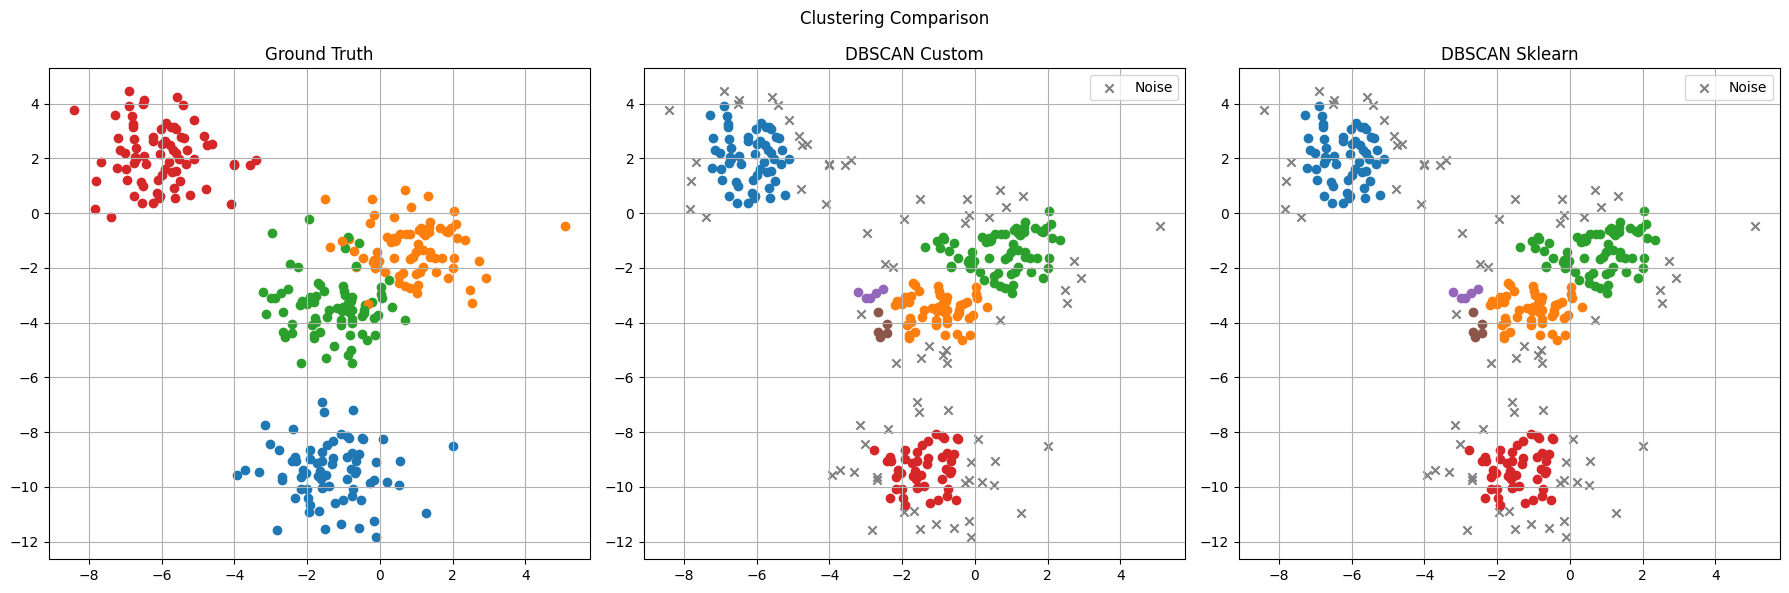

⏱️  Custom DBSCAN time:   0.2291 seconds
⏱️  Sklearn DBSCAN time:  0.0021 seconds
📊  ARI (My vs Sklearn):  1.0000


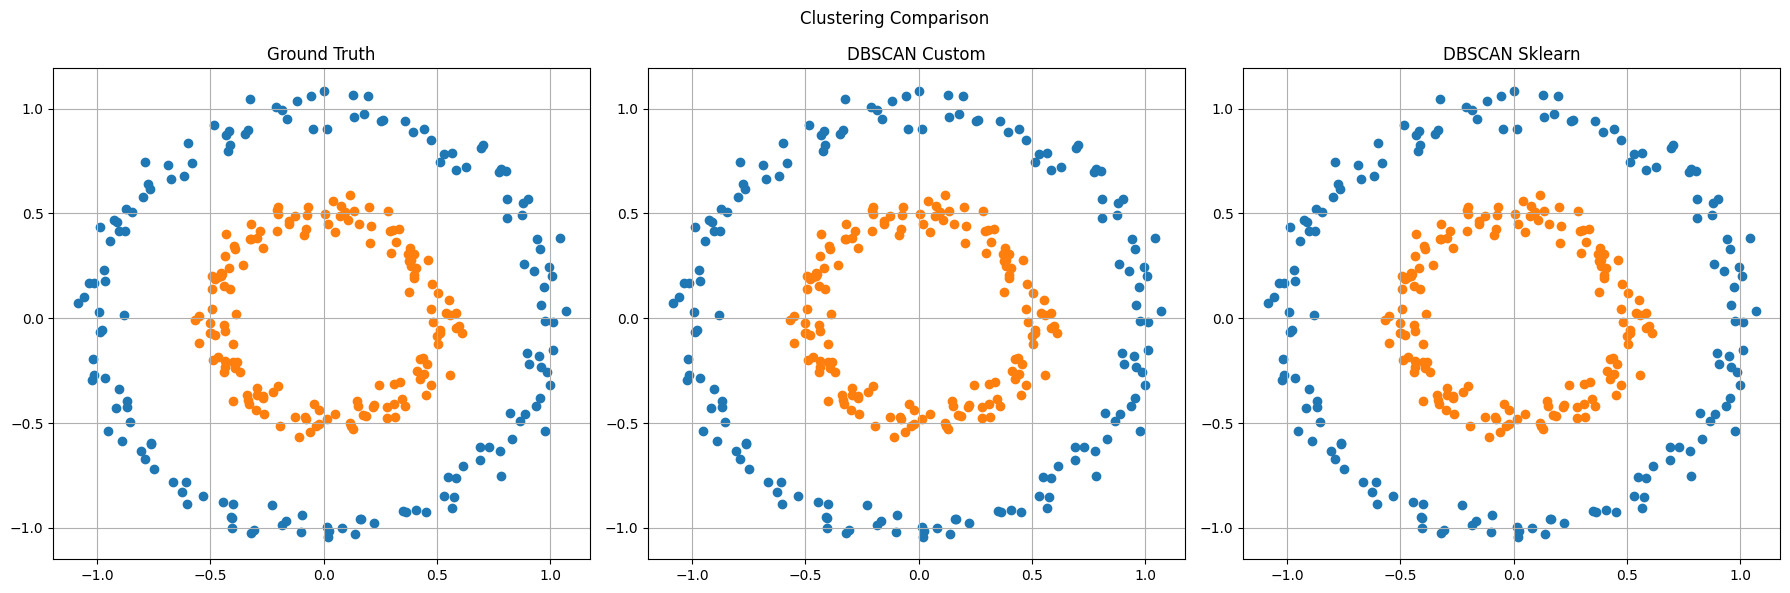

⏱️  Custom DBSCAN time:   0.2323 seconds
⏱️  Sklearn DBSCAN time:  0.0018 seconds
📊  ARI (My vs Sklearn):  1.0000


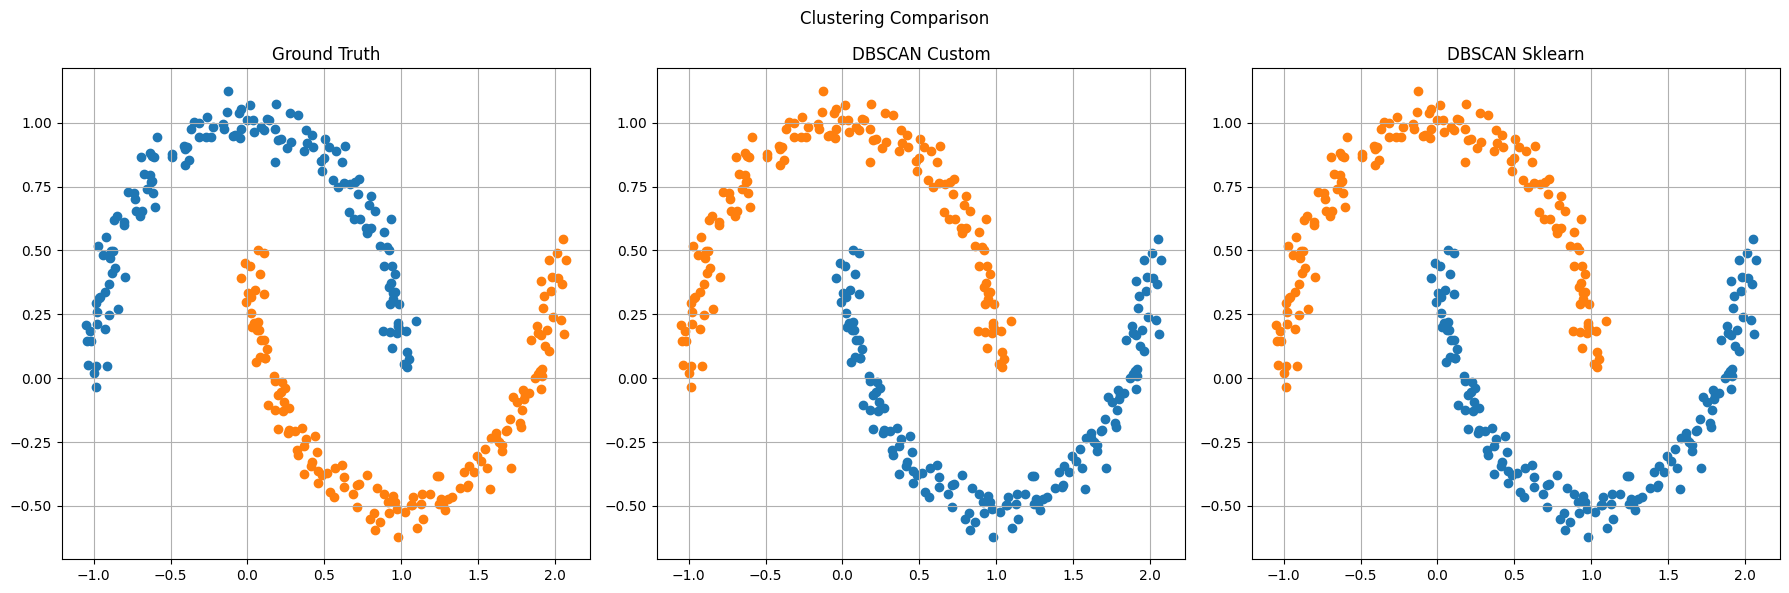

In [27]:
from sklearn.cluster import DBSCAN as DBSCAN_sklearn
from sklearn.metrics import adjusted_rand_score
import time

def test_dbscan(X, Y_true, eps=0.5):
    start_my = time.time()
    dbscan_my = DBSCAN(eps=eps)
    labels_my = dbscan_my.fit(X)
    end_my = time.time()
    labels_my

    start_sklearn = time.time()
    dbscan = DBSCAN_sklearn(eps=eps).fit(X)
    end_sklearn = time.time()

    ari_my_vs_sklearn = adjusted_rand_score(labels_my, dbscan.labels_)

    print(f"⏱️  Custom DBSCAN time:   {end_my - start_my:.4f} seconds")
    print(f"⏱️  Sklearn DBSCAN time:  {end_sklearn - start_sklearn:.4f} seconds")
    print(f"📊  ARI (My vs Sklearn):  {ari_my_vs_sklearn:.4f}")

    plot_comparison(
        'Clustering Comparison',
        X=X,
        label_sets=[Y_true, labels_my, dbscan.labels_],
        label_titles=["Ground Truth", "DBSCAN Custom", "DBSCAN Sklearn"],
        centroids_list=[None, None, None]
    )

test_dbscan(test_blobs_X, test_blobs_labels, eps=0.5)
test_dbscan(test_circles_X, test_circles_labels, eps=0.2)
test_dbscan(test_moons_X, test_moons_labels, eps=0.2)

# 4. Agglomerative clustering

⏱️  Custom Agglomerative time:   1.9018 seconds
⏱️  Sklearn Agglomerative time:  0.0018 seconds
📊  ARI (My vs Sklearn):  1.0000


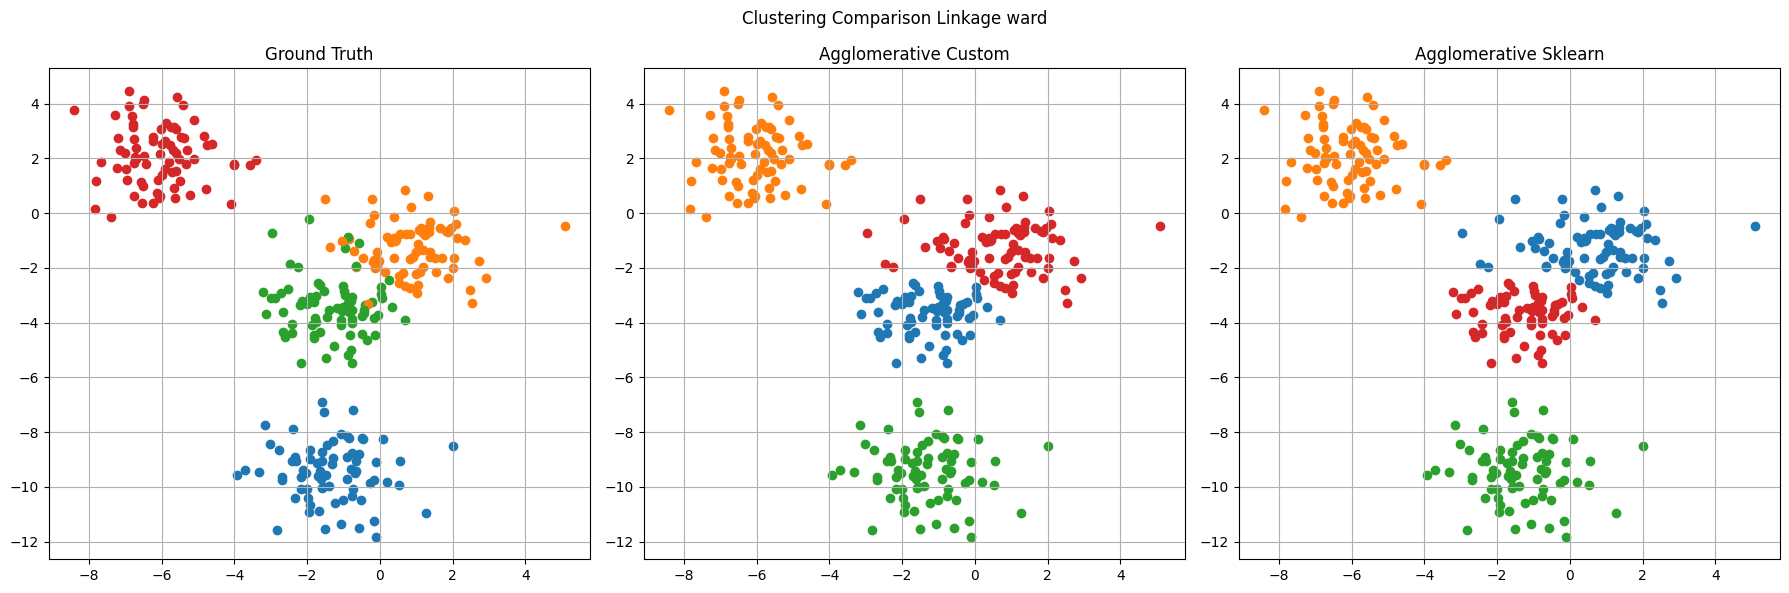

⏱️  Custom Agglomerative time:   1.2358 seconds
⏱️  Sklearn Agglomerative time:  0.0014 seconds
📊  ARI (My vs Sklearn):  1.0000


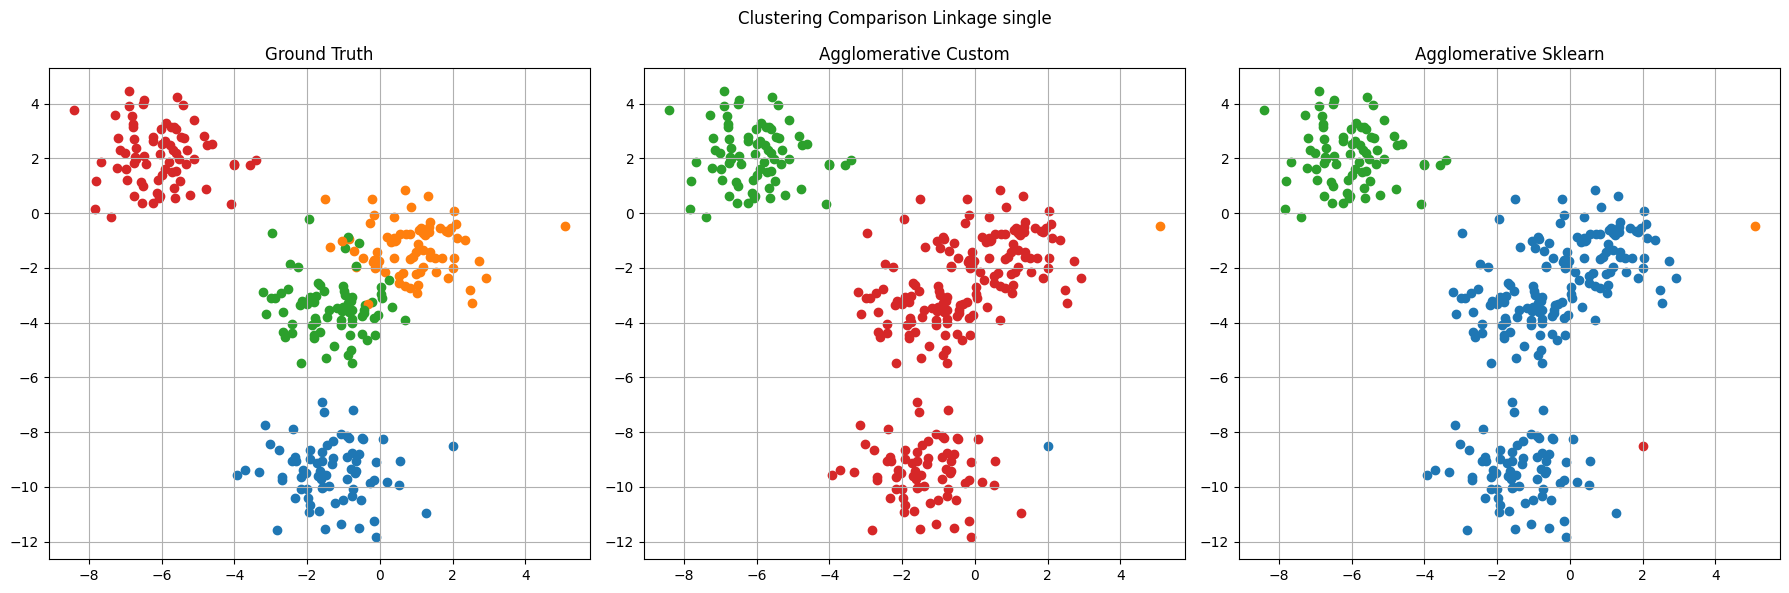

⏱️  Custom Agglomerative time:   1.2587 seconds
⏱️  Sklearn Agglomerative time:  0.0017 seconds
📊  ARI (My vs Sklearn):  1.0000


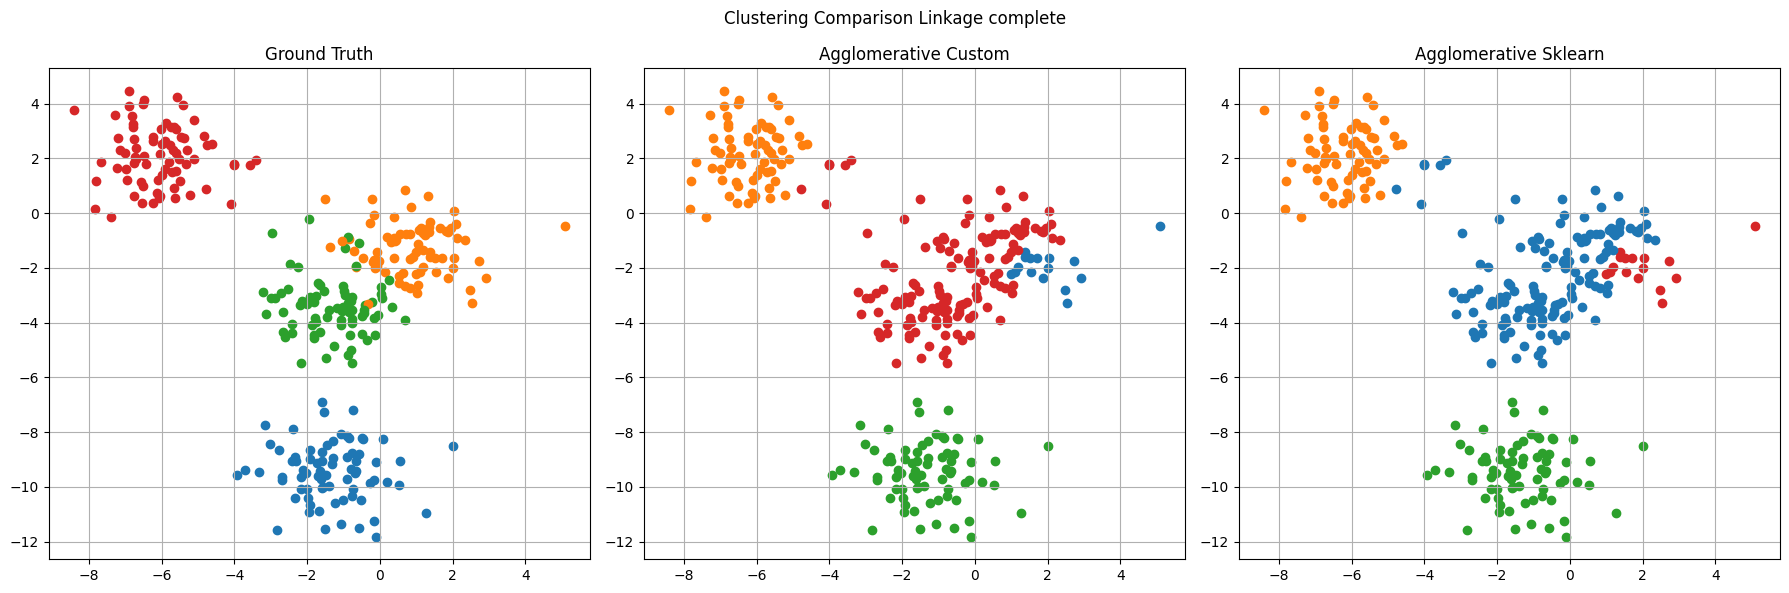

⏱️  Custom Agglomerative time:   1.2096 seconds
⏱️  Sklearn Agglomerative time:  0.0012 seconds
📊  ARI (My vs Sklearn):  1.0000


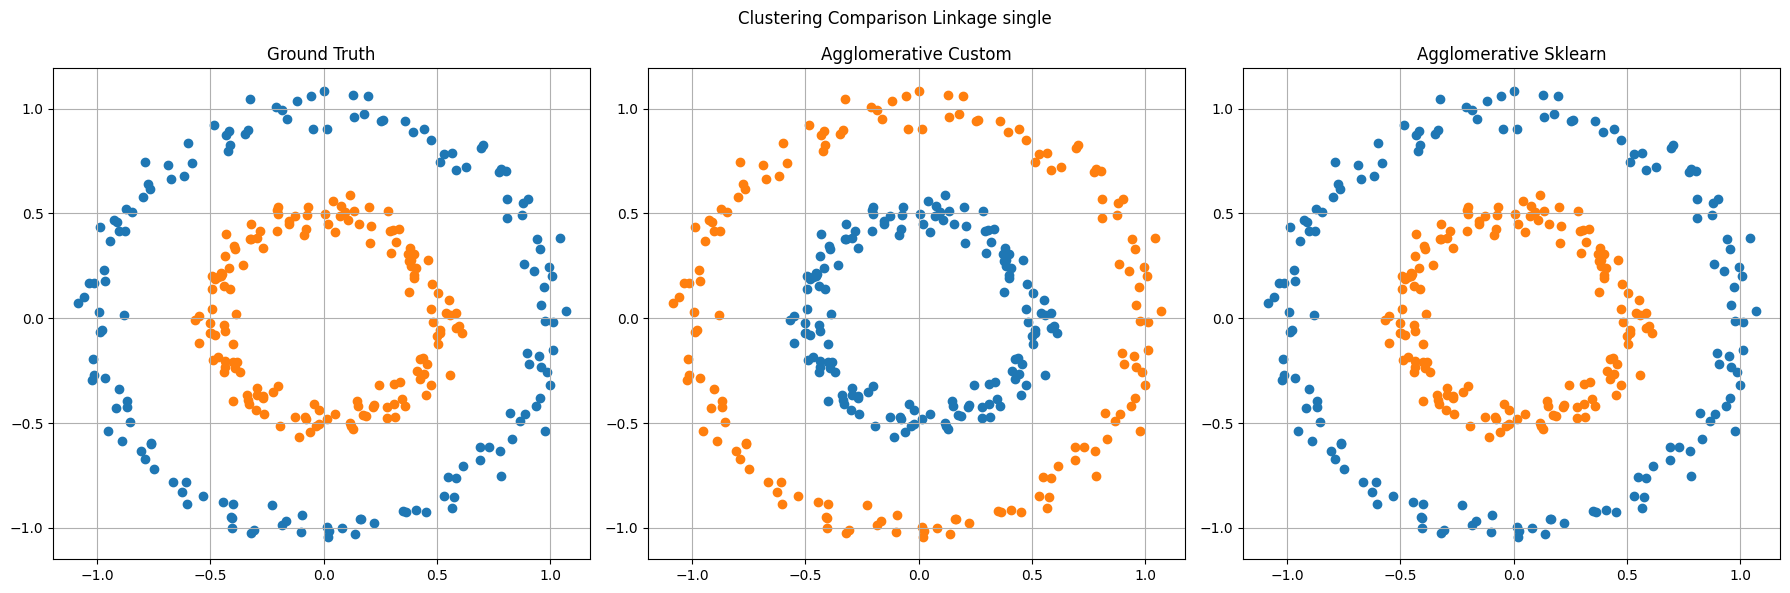

⏱️  Custom Agglomerative time:   1.3505 seconds
⏱️  Sklearn Agglomerative time:  0.0015 seconds
📊  ARI (My vs Sklearn):  1.0000


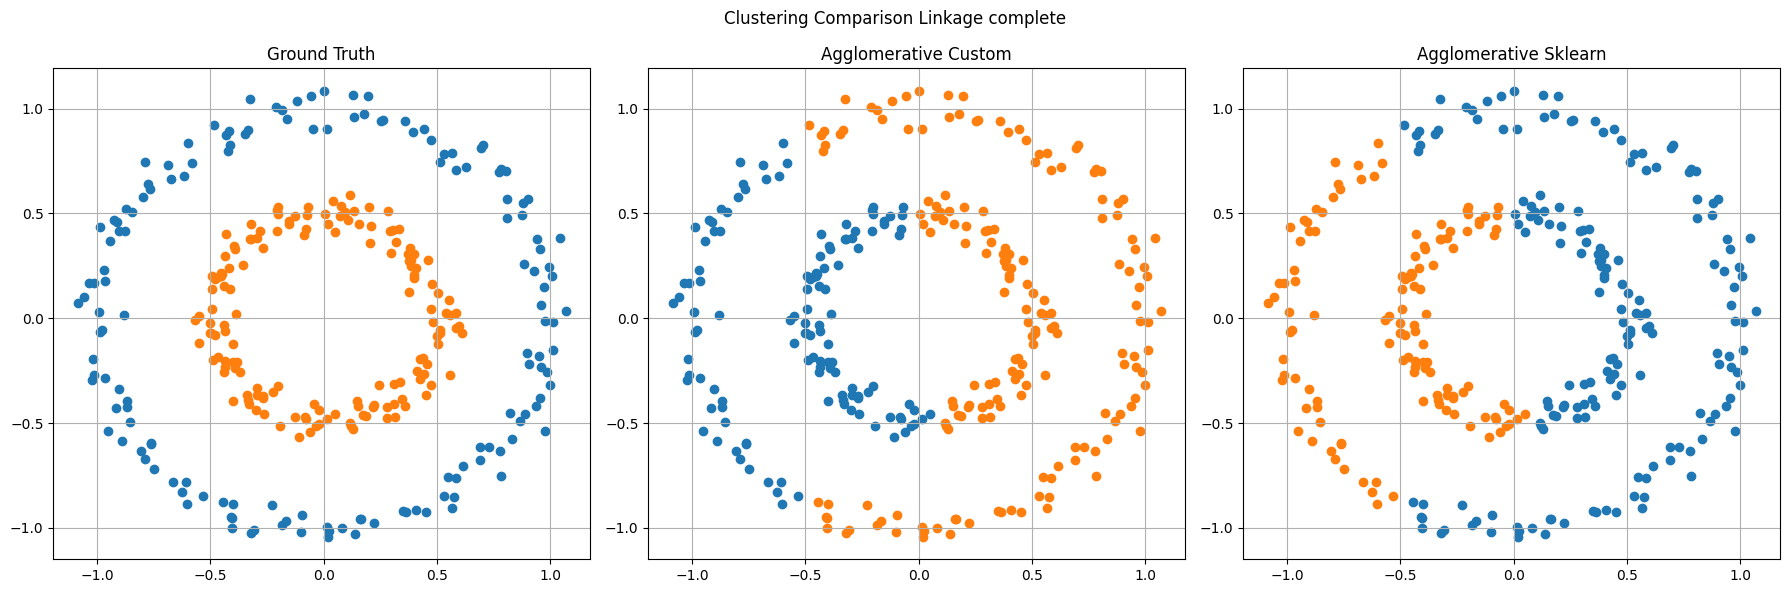

⏱️  Custom Agglomerative time:   1.2070 seconds
⏱️  Sklearn Agglomerative time:  0.0013 seconds
📊  ARI (My vs Sklearn):  1.0000


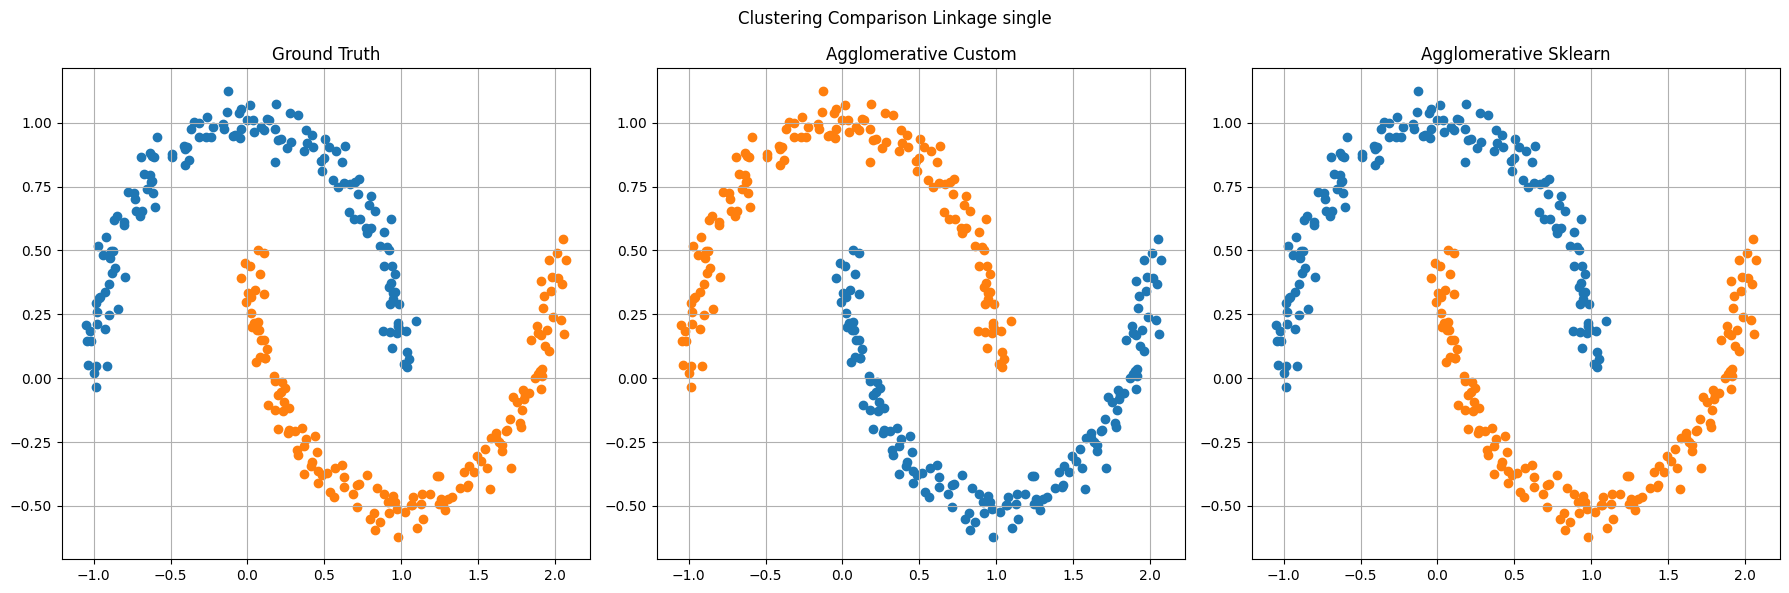

⏱️  Custom Agglomerative time:   1.2913 seconds
⏱️  Sklearn Agglomerative time:  0.0015 seconds
📊  ARI (My vs Sklearn):  1.0000


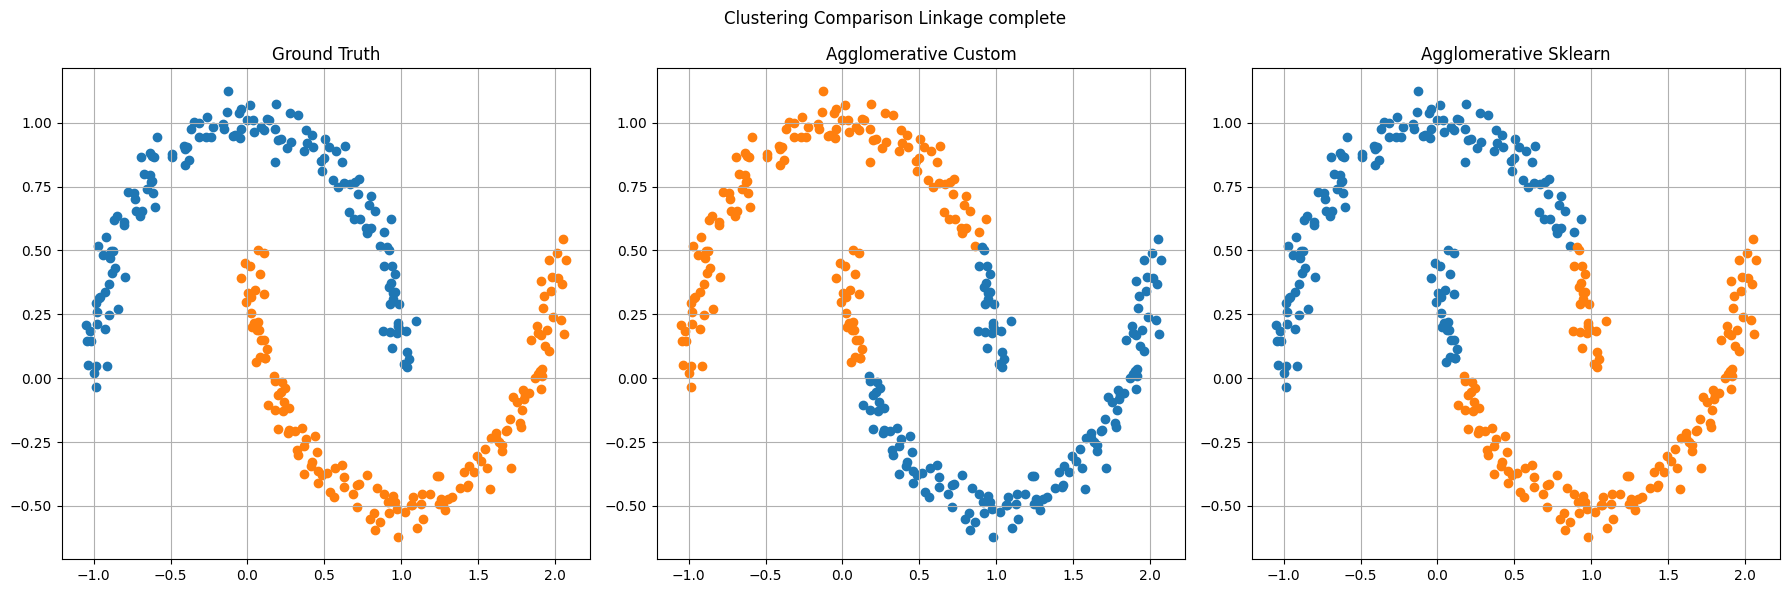

In [28]:
from sklearn.cluster import AgglomerativeClustering as AgglomerativeClustering_Sklearn

def test_agglomerative(X, Y_true, n_clusters=3, linkage="single"):
    start_my = time.time()
    agglomerative_my = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels_my = agglomerative_my.fit(X)
    end_my = time.time()

    start_sklearn = time.time()
    agglomerative = AgglomerativeClustering_Sklearn(n_clusters=n_clusters, linkage=linkage).fit(X)
    end_sklearn = time.time()

    ari_my_vs_sklearn = adjusted_rand_score(labels_my, agglomerative.labels_)

    print(f"⏱️  Custom Agglomerative time:   {end_my - start_my:.4f} seconds")
    print(f"⏱️  Sklearn Agglomerative time:  {end_sklearn - start_sklearn:.4f} seconds")
    print(f"📊  ARI (My vs Sklearn):  {ari_my_vs_sklearn:.4f}")

    plot_comparison(
        f'Clustering Comparison Linkage {linkage}',
        X=X,
        label_sets=[Y_true, labels_my, agglomerative.labels_],
        label_titles=["Ground Truth", "Agglomerative Custom", "Agglomerative Sklearn"],
        centroids_list=[None, None, None]
    )

test_agglomerative(test_blobs_X, test_blobs_labels, n_clusters=4, linkage="ward")
test_agglomerative(test_blobs_X, test_blobs_labels, n_clusters=4, linkage="single")
test_agglomerative(test_blobs_X, test_blobs_labels, n_clusters=4, linkage="complete")
test_agglomerative(test_circles_X, test_circles_labels, n_clusters=2, linkage="single")
test_agglomerative(test_circles_X, test_circles_labels, n_clusters=2, linkage="complete")
test_agglomerative(test_moons_X, test_moons_labels, n_clusters=2, linkage="single")
test_agglomerative(test_moons_X, test_moons_labels, n_clusters=2, linkage="complete")